<img
src="https://www.imt-atlantique.fr/sites/default/files/Images/Ecole/charte-graphique/IMT_Atlantique_logo_RVB_Baseline_400x272.jpg"
WIDTH=200 HEIGHT=140>

<CENTER>
</br>
<p><font size="4">  UE Computational Imaging </font></p>
<p></p>
<p><font size="5">  Présentation Projet : Graph Cut </font></p>
</p></br>
</p>
</CENTER>

---------------------------

Groupe : Leguet Emmanuel, Sellami Aziz, Terrier Bérénice

# Intro

We want to minimize the function:
$$
E(L)=\sum_{p \in \mathcal{P}} D_{p}\left(L_{p}\right)+\sum_{(p, q) \in \mathcal{N}} K_{(p, q)} \cdot T\left(L_{p} \neq L_{q}\right)
$$
where $L = \{L_p |p ∈ \mathcal{P}\}$ is a labeling of image P, $D_p(·)$ is a data penalty function, $V_{p,q}$ is an interaction potential, and $\mathcal{N}$ is a set of all pairs of neighboring pixels


which represents the "interactions" between the pixels and basically minimising this function provides a binary segmentation of the image

# Convert Image to Graph

### Imports

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from Img2Graph import *
from Utils import *

### Example 1: Basic Image

#### Draw a very basic image

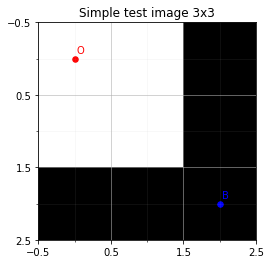

In [3]:
img = np.zeros((3,3))
img[:2,:2] = 1
Simple_Image(img, 'gray', "Simple test image 3x3")

#### Convert to graph

In [4]:
# Define priors
O = [(0,0)] # Prior Object - Source S
B = [(2,2)] # Prior Background - Sink T
priors = (O,B)

# To graph
G, Rp = image2graph(img, *priors, prior_as_index=True)

#### Visualize graph

In [5]:
import turtle
for i in range(4):
  turtle.begin_fill()
  turtle.forward(40)
  turtle.right(90)
turtle.end_fill

<function turtle.end_fill()>

In [1]:
G_sub = G.subgraph([n for n in G.nodes() if n not in ['T','S']])

plt.figure(figsize=(10,10))
pos=nx.spring_layout(G_sub)

new_pos = {p:[p[0],p[1]] for p in pos}
new_color = [{(0,0):'red', (2,2):'blue'}.get(p,'gray') for p in pos]

nx.draw_networkx(G_sub, new_pos, node_size=1500, node_color=new_color)
labels = {k:f'{v:.2f}'for (k,v) in nx.get_edge_attributes(G_sub,'capacity').items()}
nx.draw_networkx_edge_labels(G_sub, new_pos, edge_labels=labels, rotate=False)
plt.imshow(img, cmap='gray')
plt.show()

G_sub_S = G.edge_subgraph([e for e in list(G.edges) if (e[0]=='S' or e[1]=='S')])
G_sub_T = G.edge_subgraph([e for e in list(G.edges) if (e[0]=='T' or e[1]=='T')])


plt.figure(figsize=(22,10))

ax = plt.subplot(121)

pos=nx.spring_layout(G_sub_S) # pos = nx.nx_agraph.graphviz_layout(G)
new_color = [{(0,0):'red', (2,2):'blue', 'S':'darkred'}.get(p,'gray') for p in pos]

for p in pos:
    if p not in ["S", "T"]:
        rect = patches.Rectangle(pos[p]-.25/2, .25, .25, linewidth=1, edgecolor='black', facecolor='none', fill=img[p[0],p[1]])
        # Add the patch to the Axes
        ax.add_patch(rect)

nx.draw_networkx(G_sub_S, pos, node_size=1500, node_color=new_color)
labels = {k:f'{v:.2f}'for (k,v) in nx.get_edge_attributes(G_sub_S,'capacity').items()}
nx.draw_networkx_edge_labels(G_sub_S, pos, edge_labels=labels, rotate=False)


plt.subplot(122)
pos=nx.spring_layout(G_sub_T) # pos = nx.nx_agraph.graphviz_layout(G)
new_color = [{(0,0):'red', (2,2):'blue', 'T':'darkblue'}.get(p,'gray') for p in pos]
nx.draw_networkx(G_sub_T, pos, node_size=1500, node_color=new_color)
labels = {k:f'{v:.2f}'for (k,v) in nx.get_edge_attributes(G_sub_T,'capacity').items()}
nx.draw_networkx_edge_labels(G_sub_T, pos, edge_labels=labels, rotate=False)
plt.show()

NameError: name 'G' is not defined

#### Visualize the Regional Term

In [ ]:
visualize_Rp(Rp)

### Example 2: Cute Dog

# Code, implémentation, 

In [51]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from Img2Graph import *
from main import *
# import maxflow

NameError: name 'Simple_Image' is not defined

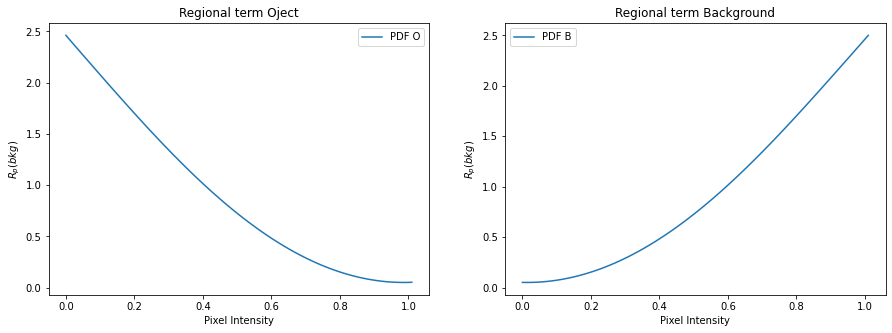

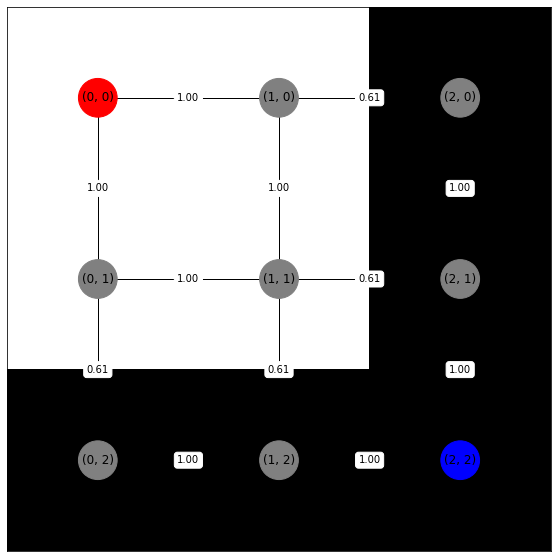

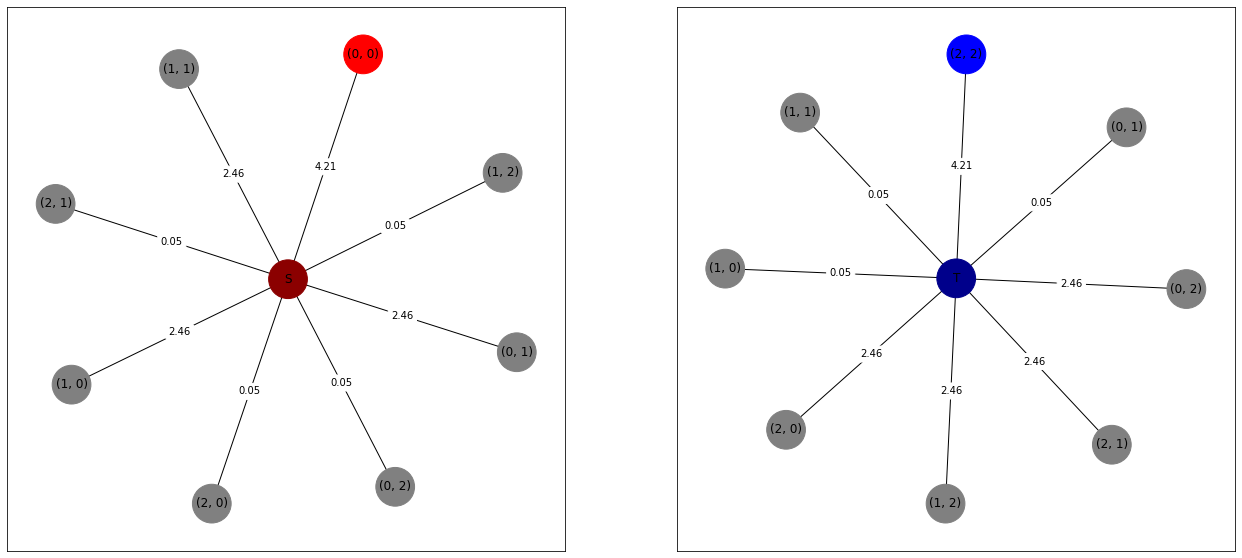

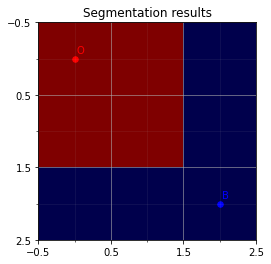

In [36]:
seg = graph2img(segment(G), *img.shape)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_title('Segmentation results')

# Major ticks every 20, minor ticks every 5
major_ticks = np.arange(-.5, 3, 1)
minor_ticks = np.arange(-.5, 3, .5)

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)

# And a corresponding grid
ax.grid(which='both')

# Or if you want different settings for the grids:
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.7)

ax.imshow(seg, cmap='seismic')
ax.scatter([0],[0], c='red', s=30)
ax.scatter([2],[2], c='blue', s=30)
ax.text(.03,-.07,'O', c='red')
ax.text(2.03,1.93,'B', c='blue')
plt.show()

# Librairie

Interface équivalente

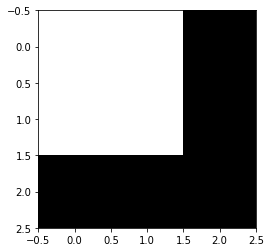

In [13]:
G, Rp, nodeids=image2graph_lib(img, O,B,prior_as_index=True, nbins=10, σ=0.1, λ=0.1)
G.maxflow()
sgm = G.get_grid_segments(nodeids)
seg2 = np.int_(np.logical_not(sgm))
plt.imshow(seg2, cmap='gray')
plt.show()

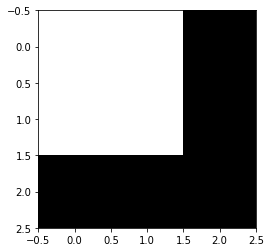

In [ ]:
G, Rp, nodeids=image2graph_lib(img, O,B,prior_as_index=True, nbins=10, σ=0.1, λ=0.1)
G.maxflow()
sgm = G.get_grid_segments(nodeids)
seg2 = np.int_(np.logical_not(sgm))
plt.imshow(seg2, cmap='gray')
plt.show()

# Test

In [14]:
from imageio import imread, imwrite
from skimage.color import rgb2gray, gray2rgb
from skimage.transform import rescale, resize, downscale_local_mean
import os
from glob import glob

In [15]:
paths = [path for path in glob(os.path.join("dataset",'images',"*.jpg"))]
images = [np.array(rgb2gray(imread(path, as_gray=False, pilmode="RGB"))) for path in paths]
groundtruths = [np.array(rgb2gray(imread(path.replace('.jpg', '.png').replace('images','images-gt'), as_gray=False, pilmode="RGB"))) for path in paths]
labels = [np.array(imread(path.replace('.jpg', '-anno.png').replace('images','images-labels'), as_gray=False, pilmode="RGB")) for path in paths]

In [16]:
def plot_img(imgs, nrow, ncol, figsize=10, legends=None, gray=True):
    fig, axs= plt.subplots(nrow, ncol, figsize=(figsize, figsize))
    n_tot=nrow*ncol
    for k in range(len(imgs)):
        idx=(k//ncol,k%ncol) if nrow>1 else k
        axs[idx].axis('off')
        if gray and len(imgs[k].shape)==2:
            axs[idx].imshow(imgs[k], cmap='gray')
        else:
            axs[idx].imshow(imgs[k])
        axs[idx].set_title(f"{legends[k]}")
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


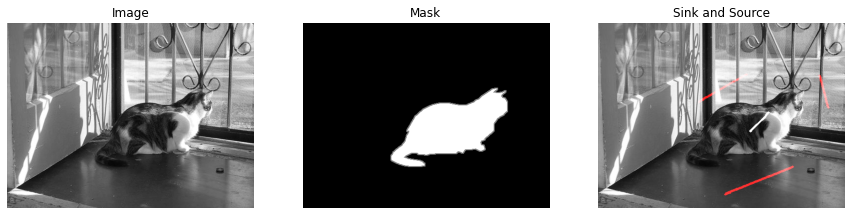

In [19]:
idx=2
mask=labels[idx]!=0
img_and_label=gray2rgb(images[idx])
img_and_label[mask]=labels[idx][mask]
plot_img([images[idx], groundtruths[idx], img_and_label], 1, 3, figsize=15,legends=['Image', 'Mask', 'Sink and Source'])

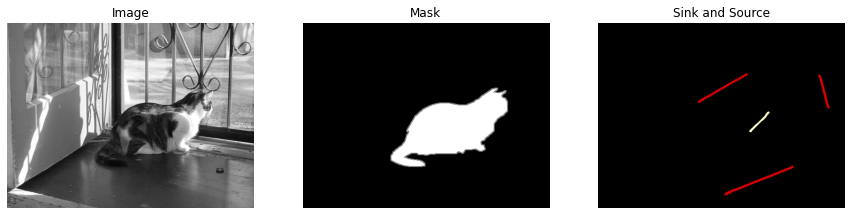

In [40]:
plot_img([images[idx], groundtruths[idx], labels[idx]], 1, 3, figsize=15,legends=['Image', 'Mask', 'Sink and Source'])

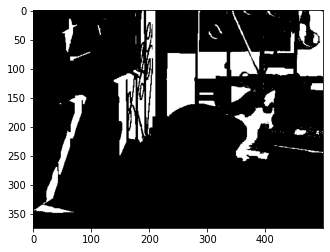

In [64]:
def initialize_priors2(img_painted):
    """Image painted with red for Object and blue for Source.
        Return the Object and Background pixels."""
    red, green, blue = np.transpose(img_painted, (2,0,1))*255
    O_mask = (red > 50) * (green < 70) * (blue < 70)
    B_mask = (red < 80) * (green < 80) * (blue > 140)
    W_mask = (red > 70) * (green > 70) * (blue > 70)
    print(W_mask)
    O = [tuple(idx) for idx in np.argwhere(O_mask)]
    B = [tuple(idx) for idx in np.argwhere(W_mask)]
    return O, B
img=images[idx]
img = resize(img, (img.shape[0] // 4, img.shape[1] // 4),
                       anti_aliasing=True)
lbl = resize(labels[idx], (labels[idx].shape[0] // 4, labels[idx].shape[1] // 4,3),
                       anti_aliasing=True)
# plt.imshow(lbl)
# plt.show()
# source,sink=initialize_priors2(lbl)
# print(source, sink)
# print(len(source),source[0], len(sink))
# plt.plot(source, sink)
# plt.show()
G, Rp, nodeids=image2graph_lib(images[idx], source,sink,prior_as_index=True, nbins=10, σ=0.1, λ=0.1)
G.maxflow()
sgm = G.get_grid_segments(nodeids)
img2 = np.int_(np.logical_not(sgm))
plt.imshow(img2, cmap='gray')
plt.show()

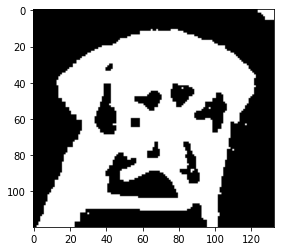

In [23]:
img = np.array(rgb2gray(imread("images/dog_small.jpg")))
img_painted = np.array(imread("images/dog_small_ST.jpg"))
source,sink=initialize_priors(img_painted)
G, Rp, nodeids=image2graph_lib(img, source,sink,prior_as_index=True, nbins=10, σ=1, λ=1)
G.maxflow()
sgm = G.get_grid_segments(nodeids)
img2 = np.int_(np.logical_not(sgm))
plt.imshow(img2, cmap='gray')
plt.show()

# Exploration des hyperparamètres 

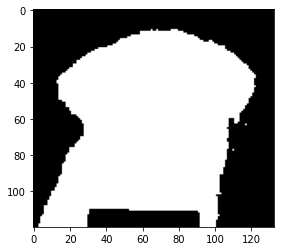

In [24]:
img = np.array(rgb2gray(imread("images/dog_small.jpg")))
img_painted = np.array(imread("images/dog_small_ST.jpg"))
source,sink=initialize_priors(img_painted)
G, Rp, nodeids=image2graph_lib(img, source,sink,prior_as_index=True, nbins=10, σ=0.1, λ=0.1)
G.maxflow()
sgm = G.get_grid_segments(nodeids)
img2 = np.int_(np.logical_not(sgm))
plt.imshow(img2, cmap='gray')
plt.show()